In [1]:
import pickle
import numpy as np
import sys
from sklearn import svm
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

# import the necessary packages
from keras import backend as Tensorflow
from keras.layers import Layer
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
import keras


np.set_printoptions(threshold=sys.maxsize)


Using TensorFlow backend.


In [2]:
pickle_in = open("train_image.pkl","rb")
Train_data = pickle.load(pickle_in)
X_train = np.array(Train_data)

In [3]:
pickle_in = open("train_label.pkl","rb")
Train_labels = pickle.load(pickle_in)
Y_train = np.array(Train_labels)

In [4]:
pickle_in = open("test_image.pkl","rb")
Test_data = pickle.load(pickle_in)
X_test = np.array(Test_data)

In [5]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=1)


In [6]:
#clf = RandomForestClassifier(n_estimators=200, max_depth=25,random_state=0)



In [7]:
# Convert to "one-hot" vectors using the to_categorical function

num_classes = 4

mapping ={'0': 0, '2': 1, '3': 2, '6': 3, }


y_train=[]

for i in range(Y_train.shape[0]):
    y_train.append(mapping[str(Y_train[i])])

y_val = []  

for i in range(Y_val.shape[0]):
    y_val.append(mapping[str(Y_val[i])])
    
# print (y_train)

y_train = keras.utils.to_categorical(y_train, num_classes,dtype='float32')
y_val = keras.utils.to_categorical(y_val, num_classes,dtype='float32')



In [8]:
image_size = 784 # 28*28
num_classes = 4 # 4 unique classes

In [24]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))
# Take a look at the model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1568)              0         
__________

In [25]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [26]:
X_train = X_train.reshape((X_train.shape[0],28,28,1))
X_val = X_val.reshape((X_val.shape[0], 28,28,1))


In [27]:
history=model.fit(X_train,
         y_train,
         batch_size=32,
         epochs=30,
         validation_data=(X_val, y_val))

Train on 6400 samples, validate on 1600 samples
Epoch 1/30
6400/6400 [==============================] - 7s 1ms/step - loss: 0.7568 - acc: 0.6803 - val_loss: 0.6162 - val_acc: 0.7344
Epoch 2/30
6400/6400 [==============================] - 7s 1ms/step - loss: 0.5885 - acc: 0.7597 - val_loss: 0.5523 - val_acc: 0.7706
Epoch 3/30
6400/6400 [==============================] - 7s 1ms/step - loss: 0.5429 - acc: 0.7850 - val_loss: 0.4783 - val_acc: 0.8169
Epoch 4/30
6400/6400 [==============================] - 7s 1ms/step - loss: 0.4859 - acc: 0.8089 - val_loss: 0.4488 - val_acc: 0.8375
Epoch 5/30
6400/6400 [==============================] - 7s 1ms/step - loss: 0.4560 - acc: 0.8181 - val_loss: 0.4197 - val_acc: 0.8406
Epoch 6/30
6400/6400 [==============================] - 7s 1ms/step - loss: 0.4446 - acc: 0.8259 - val_loss: 0.4049 - val_acc: 0.8488
Epoch 7/30
6400/6400 [==============================] - 7s 1ms/step - loss: 0.4198 - acc: 0.8344 - val_loss: 0.4055 - val_acc: 0.8400
Epoch 8/30
640

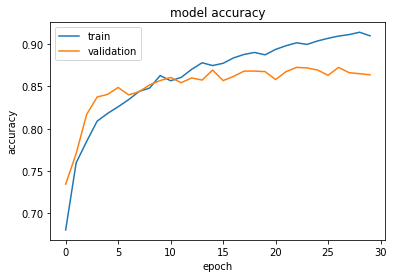

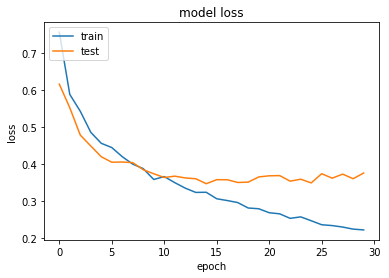

In [28]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()